# NEW CLASSIFICATION

In [81]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics


%matplotlib inline 

In [15]:
#calling in the data from sklearn and exploring it a little
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
categories = data.target_names
categories

In [27]:
# fetching the training and testing dataset
train = fetch_20newsgroups(subset='train',categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories) 

In [32]:
print(test.data[5])

From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: OSU College of Osteopathic Medicine
Lines: 91
Nntp-Posting-Host: vms.ocom.okstate.edu

In article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:
> 
> In a previous article, banschbach@vms.ocom.okstate.edu () says:
>>least a few "enlightened" physicians practicing in the U.S.  It's really 
>>too bad that most U.S. medical schools don't cover nutrition because if 
>>they did, candida would not be viewed as a non-disease by so many in the 
>>medical profession.
> 
> Case Western Reserve Med School teaches nutrition in its own section as
> well as covering it in other sections as they apply (i.e. B12
> deficiency in neuro as a cause of neuropathy, B12 deficiency in
> hematology as a cause of megaloblastic anemia), yet I sill
> hold the viewpoint of mainstream medicine:  candida can cause
> mucocutaneous candidiasis, and, in already very sick patients
> 

In [33]:
# Importing necessary packages for text manipulation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [35]:
#creating a model based on multinomial naive bayes
MultiNB = make_pipeline(TfidfVectorizer(),MultinomialNB())
MultiNB.fit(train.data,train.target)
pred = MultiNB.predict(test.data)


### Building a visual

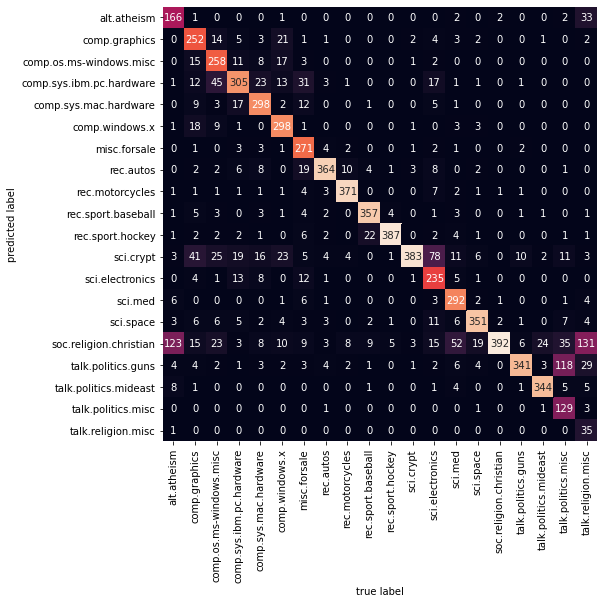

In [47]:
# sns.set_style('dark')
f,axes = plt.subplots(figsize =(8,8))

#creating confusion matrix and heat map
from sklearn import metrics

mat = metrics.confusion_matrix(test.target, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt ='d', cbar=False, xticklabels=train.target_names,
           yticklabels=train.target_names)

#plottiing heatmap of confusion matrix
plt.xlabel('true label')
plt.ylabel('predicted label');

### Making predictions based on the model

In [75]:
categories[MultiNB.predict(['Jesus Christ'])[0]]

'soc.religion.christian'

In [76]:
#Function to make prediction
def predict_category(s, train=train, MultiNB=MultiNB):
    pred = MultiNB.predict([s])
    return categories[pred[0]]

In [77]:
# testing the prediction function
predict_category('Jesus Christ')

'soc.religion.christian'

In [78]:
predict_category('BMW is better than Audi')

'rec.autos'

In [80]:
predict_category('President of india')

'talk.politics.misc'